### **Tugas Praktikum - Dataset Mall Customers**

1. K-Means Data Mall_Customer

In [1]:
# Import data & library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

df = pd.read_csv('/content/drive/MyDrive/Machine_Learning/Clustering/Mall_Customers.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Seleksi fitur

X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

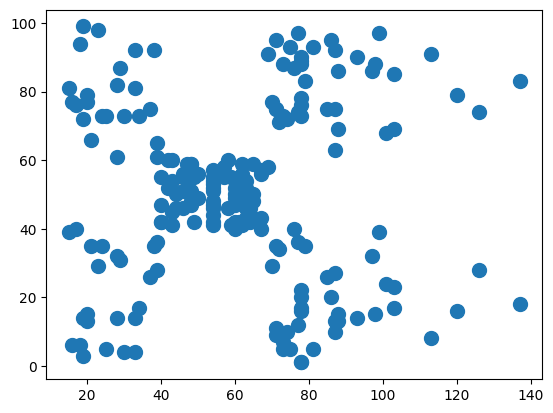

In [3]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100)

In [4]:
from sklearn.cluster import KMeans

# Inisiasi obyek KMeans
cl_kmeans = KMeans(n_clusters=2)

# Fit dan predict model
y_kmeans = cl_kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


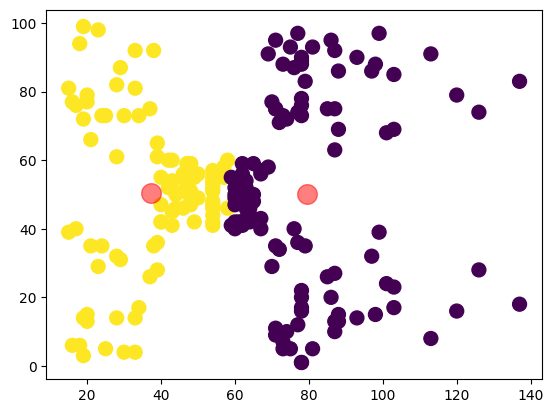

In [5]:
# Plot hasi cluster berdasarkan Sepal Length dan Sepal Width
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 100, c=y_kmeans)

# Plot centroid
centers = cl_kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

In [6]:
# Cek Nilai SSE
print(f'Nilai SSE: {cl_kmeans.inertia_}')

Nilai SSE: 181363.59595959593


K=2: SSE=183653.32894736843
K=3: SSE=106348.37306211122
K=4: SSE=73880.64496247195
K=5: SSE=44448.4554479337
K=6: SSE=37265.86520484346
K=7: SSE=31644.3190379202
K=8: SSE=25050.832307547527
K=9: SSE=27238.651469363973
K=10: SSE=22186.05214663218




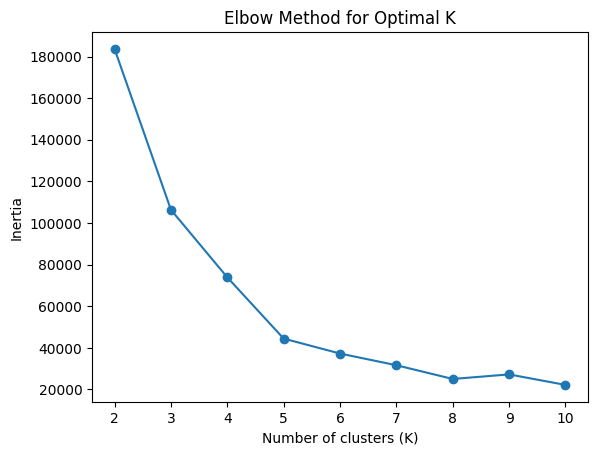

In [7]:
# Menentukan jumlah cluster (K) yang optimal
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init='auto')  # Mengatasi peringatan dengan n_init='auto'
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    print(f"K={k}: SSE={kmeans.inertia_}")

print("\n")
# Menampilkan plot Elbow untuk membantu memilih K
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

2. Buatlah  implementasi model SOM untuk segmentasi citra lain

In [8]:
pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10588 sha256=649e249197eb8ed95a5e8e4e9b80f196b2af45ca5d6ad382f5a302d7e3373fc1
  Stored in directory: /root/.cache/pip/wheels/c7/92/d2/33bbda5f86fd8830510b16aa98c8dd420129b5cb24248fd6db
Successfully built minisom


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform

In [26]:
# Fungsi untuk menginisialisasi bobot SOM
def initialize_weights(input_shape, output_shape):
    return np.random.rand(output_shape[0], output_shape[1], input_shape[2])

In [27]:
# Fungsi untuk menghitung jarak antara vektor input dan bobot SOM
def calculate_distance(input_vector, weights):
    return np.linalg.norm(input_vector - weights, axis=2)

In [28]:
# Fungsi untuk menemukan indeks unit pemenang (unit dengan bobot terdekat)
def find_winner_unit_in_image(input_vector, weights):
    distances = calculate_distance(input_vector, weights)
    return np.unravel_index(np.argmin(distances), distances.shape)

In [29]:
# Fungsi untuk memperbarui bobot SOM
def update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius):
    distances = np.linalg.norm(np.indices(weights.shape[:2]).T - np.array(winner).reshape(1, -1), axis=2)
    influence = np.exp(-distances / (2 * neighborhood_radius**2))
    weights += learning_rate * influence[:, :, np.newaxis] * (input_vector - weights)

In [30]:
# Fungsi untuk melatih SOM
def train_som(image, num_epochs, initial_learning_rate, initial_neighborhood_radius):
    input_shape = image.shape
    som_shape = (10, 10, input_shape[2])  # Ukuran SOM sesuai dengan jumlah saluran warna
    weights = initialize_weights(input_shape, som_shape)

    for epoch in range(num_epochs):
        # Update parameter pembelajaran dan radius tetangga
        learning_rate = initial_learning_rate * np.exp(-epoch / num_epochs)
        neighborhood_radius = initial_neighborhood_radius * np.exp(-epoch / num_epochs)
        # Pemrosesan SOM
        for i in range(input_shape[0]):
            for j in range(input_shape[1]):
                input_vector = image[i, j, :]
                winner = find_winner_unit_in_image(input_vector, weights)
                update_weights(input_vector, weights, winner, learning_rate, neighborhood_radius)

    return weights

In [37]:
# Load citra Lenna (Anda bisa mengganti ini dengan citra lain jika diperlukan)
cat_path = "/content/drive/MyDrive/Machine_Learning/Clustering/cat.jpg"
cat = io.imread(cat_path) / 255.0  # Normalisasi intensitas piksel menjadi rentang [0, 1]
cat = transform.resize(cat, (100, 100, 3), mode='reflect', anti_aliasing=True)

In [38]:
# Latih SOM
num_epochs = 100
initial_learning_rate = 0.1
initial_neighborhood_radius = 5
trained_weights = train_som(cat, num_epochs, initial_learning_rate, initial_neighborhood_radius)

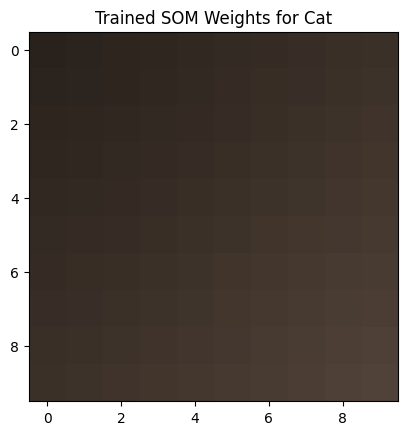

In [41]:
# Visualisasi bobot SOM
plt.imshow(trained_weights)
plt.title('Trained SOM Weights for Cat')
plt.show()